## **データ整理**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
from tqdm import tqdm

from myUtils import reduce_mem_usage, get_agg_df

import gc

#### [参考]submissionファイルに合わせてaggurigationした学習データ作成
https://www.kaggle.com/sachina/convert-accuracy-to-uncertainty-poisson

In [2]:
sales_train_val = pd.read_csv(os.path.join("rawdata","sales_train_evaluation.csv")) # データの読み出し

In [53]:
#ppred_path = os.path.join("submission_point","M5-Forecasting-EDA_FE_and_Modeling_ppred_removed_negetiveV.csv")
#ppred_path = os.path.join("submission_point","SoTA-NB_ppred_removed_NegetiveV_validation_is_predicted.csv")
#ppred_path = os.path.join("submission_point","SoTA-NB_ppred_removed_NegetiveV_validation_is_predicted_TrainValid.csv")
#ppred_path = os.path.join("submission_point","MAandLightGBM_ppred_submission.csv")
#ppred_path = os.path.join("submission_point","M5-Dark_Witch_Time_by_Store_submission.csv")
#ppred_path = os.path.join("submission_point","xgboost_cv_UseValidPreds_foldday56_useday365.csv")
#ppred_path = os.path.join("submission_point","xgboost_cv_UseValidPredsIsTrue_Negative2ZeroIsFalse_StepWisePredIsTrue_foldday56_useday365.csv")
#ppred_path = os.path.join("submission_point","xgboost_cv_UseValidPredsIsTrue_Negative2ZeroIsTrue_foldday56_useday365_lagOlder28.csv")
ppred_path = os.path.join("submission_point","XGBoost_features_ver1_submission.csv")

In [54]:
sub_ppred = pd.read_csv(ppred_path)

In [55]:
sub_ppred

,id,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28
0,FOODS_1_001_CA_1_validation,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,6.000000,...,2.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
1,FOODS_1_001_CA_2_validation,0.000000,3.000000,0.000000,0.000000,0.000000,1.000000,4.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,2.000000,0.000000
2,FOODS_1_001_CA_3_validation,1.000000,0.000000,1.000000,0.000000,8.000000,1.000000,0.000000,0.000000,1.000000,...,1.000000,2.000000,2.000000,0.000000,0.000000,1.000000,0.000000,3.000000,2.000000,2.000000
3,FOODS_1_001_CA_4_validation,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
4,FOODS_1_001_TX_1_validation,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,5.000000,0.000000,2.000000,2.000000,0.000000,2.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60975,HOUSEHOLD_2_516_TX_2_evaluation,0.155273,0.148315,0.140381,0.182251,0.197266,0.381348,0.405762,0.214844,0.148315,...,0.216187,0.381104,0.403809,0.166504,0.149536,0.135010,0.191284,0.206299,0.372803,0.379395
60976,HOUSEHOLD_2_516_TX_3_evaluation,0.134644,0.112732,0.131714,0.155518,0.124695,0.274658,0.257812,0.179932,0.112732,...,0.140503,0.328613,0.316650,0.158569,0.168457,0.180786,0.164551,0.133667,0.266113,0.232788
60977,HOUSEHOLD_2_516_WI_1_evaluation,-0.097290,-0.085327,-0.047974,0.000944,0.023300,0.159790,0.120239,-0.043304,-0.085327,...,0.032532,0.189697,0.172241,-0.079468,-0.062317,-0.029785,0.004169,0.026520,0.155151,0.086121
60978,HOUSEHOLD_2_516_WI_2_evaluation,-0.054413,-0.048615,-0.043274,-0.000512,0.021835,0.097656,0.052765,-0.002005,-0.048615,...,0.032013,0.126953,0.104187,-0.025833,-0.031433,-0.030914,0.002716,0.025070,0.093018,0.018616


In [56]:
sub_ppred = sub_ppred.set_index("id",drop=True)
#sub_ppred[sub_ppred < 0] = 0
sub_ppred = sub_ppred.reset_index()

In [57]:
valid = sub_ppred[sub_ppred["id"].str.contains("validation")]
valid["id"] = valid["id"].str.replace("_validation","_evaluation")
evalu = sub_ppred[sub_ppred["id"].str.contains("evaluation")]

C:\Users\organ\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [58]:
print("validation row:",len(valid))
print("evaluation row:",len(evalu))

validation row: 30490
evaluation row: 30490


In [59]:
valid = pd.merge(valid,sales_train_val[['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id']],on="id",how="left")
evalu = pd.merge(evalu,sales_train_val[['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id']],on="id",how="left")

valid_agg = get_agg_df(valid)
evalu_agg = get_agg_df(evalu)

In [60]:
valid_agg.to_csv("agg_ppred_valid.csv",index=False)
evalu_agg.to_csv("agg_ppred_evalu.csv",index=False)

In [61]:
valid_agg = valid_agg.set_index("id",drop=True).T
evalu_agg = evalu_agg.set_index("id",drop=True).T

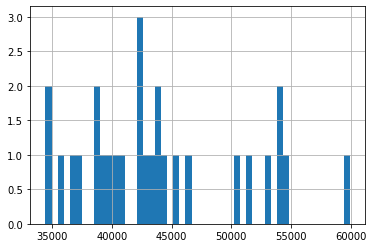

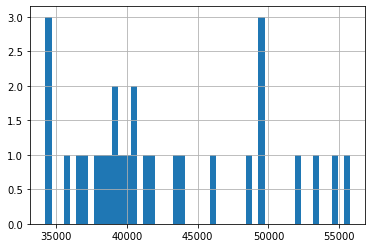

In [62]:
plt.hist(valid_agg["Total_X"],bins=50)
plt.grid(True)
plt.show()

plt.hist(evalu_agg["Total_X"],bins=50)
plt.grid(True)
plt.show()

In [63]:
valid = valid[['id', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10',
       'F11', 'F12', 'F13', 'F14', 'F15', 'F16', 'F17', 'F18', 'F19', 'F20',
       'F21', 'F22', 'F23', 'F24', 'F25', 'F26', 'F27', 'F28']]
evalu = evalu[['id', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10',
       'F11', 'F12', 'F13', 'F14', 'F15', 'F16', 'F17', 'F18', 'F19', 'F20',
       'F21', 'F22', 'F23', 'F24', 'F25', 'F26', 'F27', 'F28']]

In [64]:
valid = valid.set_index("id",drop=True).T
evalu = evalu.set_index("id",drop=True).T

In [65]:
print("valid 0の数:",(valid < 0).sum().sum())
print("evalu 0の数:",(evalu < 0).sum().sum())

valid 0の数: 0
evalu 0の数: 34222


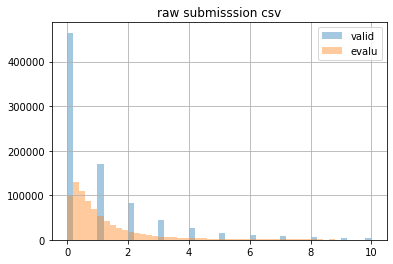

In [66]:
plt.title("raw submisssion csv")
plt.hist(np.reshape(valid.values,(1,-1))[0,:],label="valid",bins=50,alpha=0.4,range=(0,10))
plt.hist(np.reshape(evalu.values,(1,-1))[0,:],label="evalu",bins=50,alpha=0.4,range=(0,10))
plt.grid(True)
plt.legend()
plt.show()

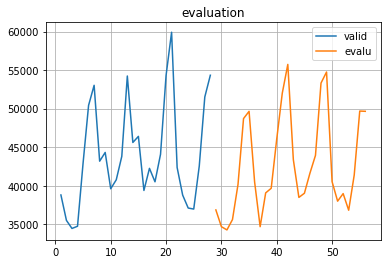

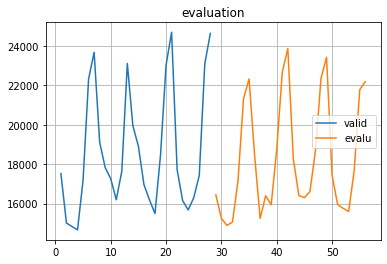

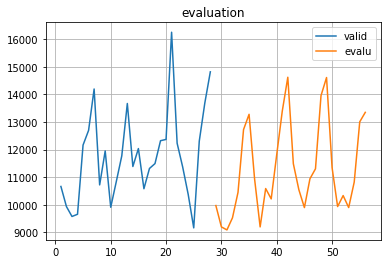

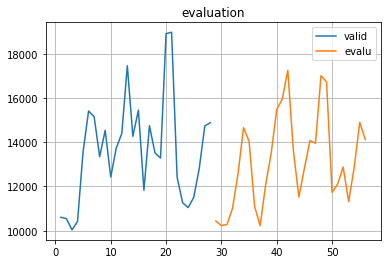

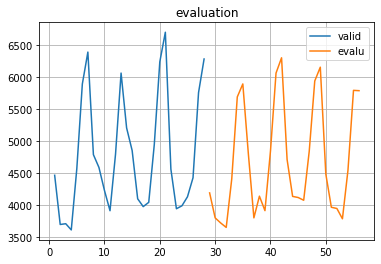

In [67]:

for col in evalu_agg.columns[:5]:
    fig = plt.figure()
    plt.plot(range(1,29),valid_agg[col].values,label="valid")
    plt.plot(range(29,29+28),evalu_agg[col].values,label="evalu")
    #plt.ylim(0,60000)
    plt.grid()
    plt.title("evaluation")
    plt.legend()
    plt.show()